# Experiment Nine

## Processing

In [1]:
%load_ext pycodestyle_magic

In [2]:
# Analytical Tools
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns

# General Utilities
import json
import pprint

# Custom Utilities
import utilities.processing as processing
import utilities.plotting as plotting
import utilities.describe as describe

# Some settings
log = pprint.pprint
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

### Reading Data and Defining Constants

Notice the first three entries of the `survey-eight-entries.json` are discarded since they were collected before the experiment went live. This can be seen from the fact that these are the only three entries without a `responseType` attribute. These were written to the database before this was added to the code.

In [3]:
FILE_NAMES = [
    'raw-data/survey-eight-entries.json',
    'raw-data/survey-nine-entries.json'
]

NUM_QUESTIONS, NUM_JUDGEMENTS = 10, 7
GROUP_SIZE = NUM_QUESTIONS // 2

ALL_LABELS = processing.get_all_labels(NUM_QUESTIONS)
LOW_LABELS, HIGH_LABELS = ALL_LABELS[:GROUP_SIZE], ALL_LABELS[GROUP_SIZE:]
JUDGMENT_LABELS = processing.get_judgment_labels(NUM_JUDGEMENTS)

master_responses = []
for name in FILE_NAMES:
    with open(name) as file:
        master_responses.extend(json.loads(line) for line in file if line)
master_responses = master_responses[3:]

### Reading Responses into Data

In [4]:
col_labels = processing.get_col_labels(NUM_QUESTIONS,
                                       NUM_JUDGEMENTS)
data = {label: [] for label in col_labels}

In [5]:
processing.fill_experiment_data(data, master_responses)

In [6]:
data = pd.DataFrame(data)
sample_size = len(data)
print(data.size, sample_size)
data.head()

145644 1374


,consent,group_number,high_q0_choice,high_q0_index,high_q0_j0,high_q0_j1,high_q0_j2,high_q0_j3,high_q0_j4,high_q0_j5,...,low_q4_j2,low_q4_j3,low_q4_j4,low_q4_j5,low_q4_j6,low_q4_score,participant_id,response_type,test_one,test_two
0,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,99rekf2t4xdtu5odhzavjdvp9xuonxrj,1,NaN,NaN
1,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,452qucx2hfd37w8xa6lqqaot87zse4os,1,NaN,NaN
2,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,bnl1pze39sr3r5tbqymy43wet88xcjcz,1,NaN,NaN
3,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ot522v0x3kbbo1fdkksm99rsc21gvv9g,1,NaN,NaN
4,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,y28quqev3xut7s1s765onuyy775mq59v,1,NaN,NaN


In [7]:
view_data = data[data.response_type == 1]
response_data = data[data.response_type == 0]
response_data = response_data[response_data.consent == 1]

print(len(view_data), len(response_data))
print('{:.4}% completion'.format(len(response_data) / len(view_data) * 100))

774 600
77.52% completion


### Seperating Groups and Checking Response Rate

In [8]:
control_views = view_data[view_data.group_number == 0] 
post_views = view_data[view_data.group_number == 1]
upvote_views = view_data[view_data.group_number == 2]
control_responses = response_data[response_data.group_number == 0]
post_responses = response_data[response_data.group_number == 1]
upvote_responses = response_data[response_data.group_number == 2]

print(len(control_views), len(post_views), len(upvote_views))
print(len(control_responses), len(post_responses), len(upvote_responses))

186 197 391
138 161 301


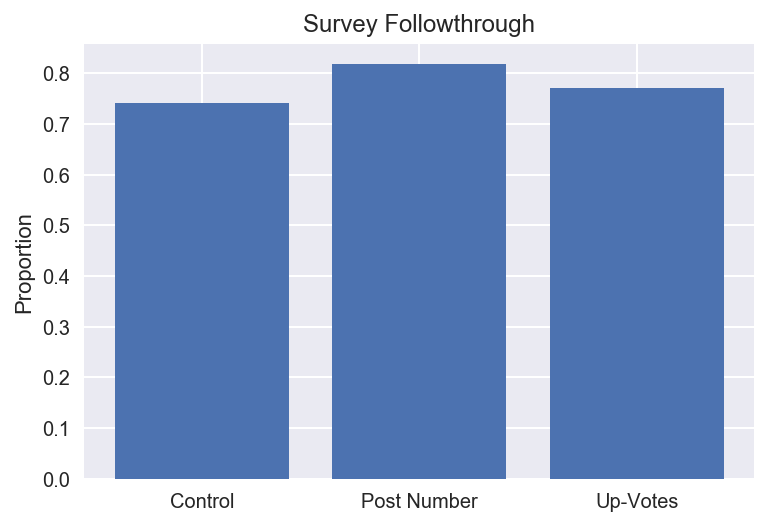

In [9]:
PLOTTING_OPTIONS = {
    'y_label': 'Proportion',
    'ticks': ['Control', 'Post Number', 'Up-Votes'],
    'title': 'Survey Followthrough',
    
}

plotting.plot_single_bar(
    [len(control_responses) / len(control_views),
     len(post_responses) / len(post_views),
     len(upvote_responses) / len(upvote_views)],
    **PLOTTING_OPTIONS
)

### Checking Quiz Results

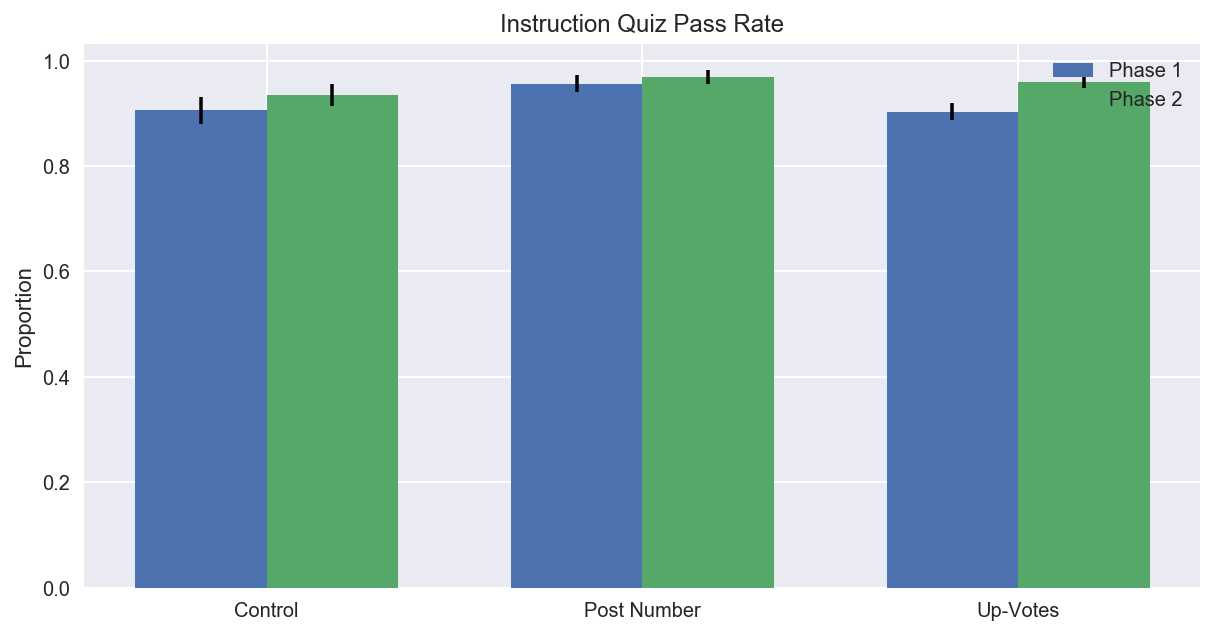

In [17]:
PLOTTING_OPTIONS = {
    'y_label': 'Proportion',
    'ticks': ['Control', 'Post Number', 'Up-Votes'],
    'legend': ['Phase 1', 'Phase 2'],
    'title': 'Instruction Quiz Pass Rate',
    'size': (10, 5)
}

one_means, one_errs = [], []
two_means, two_errs = [], []
for group in (control_responses, post_responses, upvote_responses):
    one_means.append(group.test_one.mean())
    one_errs.append(stats.sem(group.test_one))
    two_means.append(group.test_two.mean())
    two_errs.append(stats.sem(group.test_two))
    
plotting.plot_double_bar(one_means, one_errs, two_means,
                         two_errs, **PLOTTING_OPTIONS)


In [26]:
new_control_responses = control_responses[control_responses.test_one == 1]
new_control_responses = new_control_responses[new_control_responses.test_two == 1]
new_post_responses = post_responses[post_responses.test_one == 1]
new_post_responses = new_post_responses[new_post_responses.test_two == 1]
new_upvote_responses = upvote_responses[upvote_responses.test_one == 1]
new_upvote_responses = new_upvote_responses[new_upvote_responses.test_two == 1]

control_removed = len(control_responses) - len(new_control_responses)
post_removed = len(post_responses) - len(new_post_responses)
upvote_removed = len(upvote_responses) - len(new_upvote_responses)

print('Control: {} removed ({:.3}%) {} left'.format(
    control_removed,
    control_removed / len(control_responses),
    len(new_control_responses)
))
print('Post: {} removed ({:.3}%) {} left'.format(
    post_removed,
    post_removed / len(new_post_responses),
    len(new_post_responses)
))
print('Upvote: {} removed ({:.3}%) {} left'.format(
    upvote_removed,
    upvote_removed / len(new_upvote_responses),
    len(new_upvote_responses)
))

Control: 18 removed (0.13%) 120 left
Post: 12 removed (0.0805%) 149 left
Upvote: 37 removed (0.14%) 264 left
